# 1.导入需要的包

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

# 2.导入需要的数据集

In [2]:
wine = load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

# 3.sklearn 建模的基本流程

In [3]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(wine.data,wine.target,test_size=0.3,random_state=42)

clf = DecisionTreeClassifier(random_state=0)

rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(xtrain,ytrain)
rfc = rfc.fit(xtrain,ytrain)
score_c = clf.score(xtest,ytest)
score_r = rfc.score(xtest,ytest)

print("single tree:{}".format(score_c),"Random Forest:{}".format(score_r))

single tree:0.9629629629629629 Random Forest:1.0


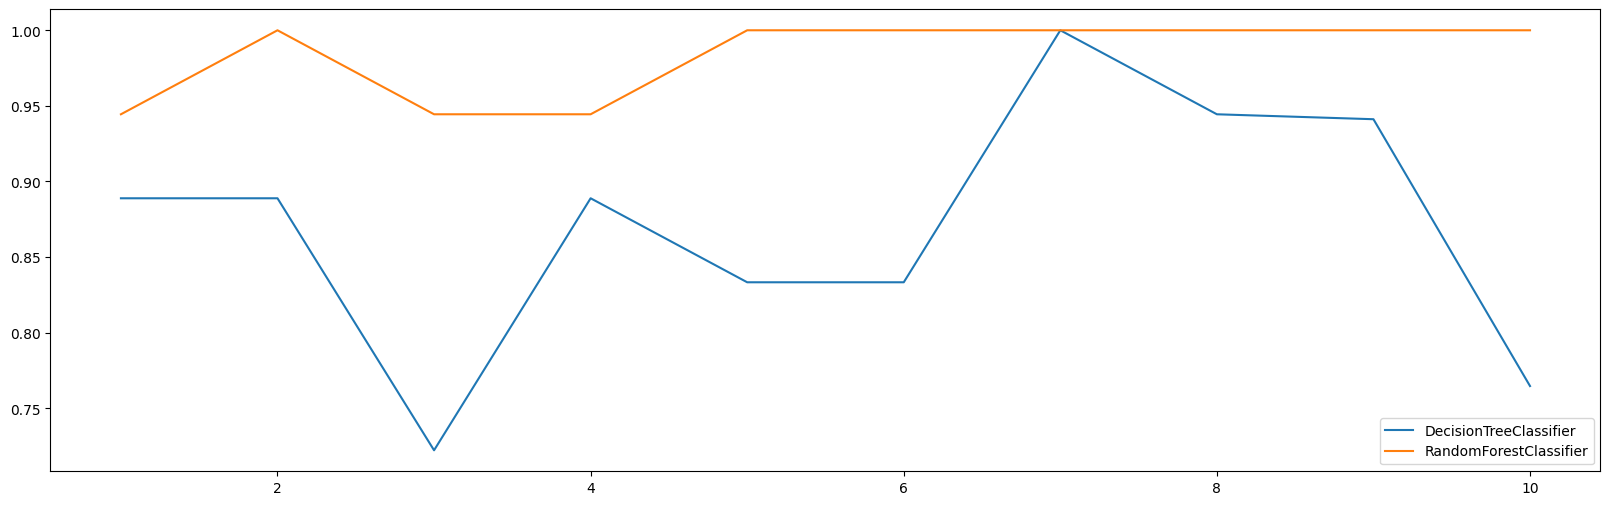

In [4]:
# 4画出随机森林和决策树在一组交叉验证的效果对比
#交叉验证：将数据集划分成n份，依次取一份做测试集，n-1作为训练集，多次训练模型以观测模型的稳定性
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier(random_state=0)
clf_c = cross_val_score(clf,wine.data,wine.target,cv=10)

rfc = RandomForestClassifier(random_state=0)

rfc_c = cross_val_score(rfc,wine.data,wine.target,cv=10)
plt.figure(figsize=[20,6])
plt.plot(range(1,11),clf_c,label='DecisionTreeClassifier')
plt.plot(range(1,11),rfc_c,label='RandomForestClassifier')
plt.legend(loc=4)

# 5.画出随机森林和决策树在十组交叉验证下的效果对比

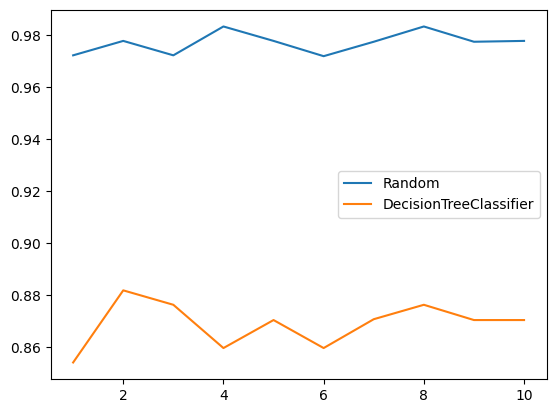

In [5]:
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)

    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label='Random')
plt.plot(range(1,11),clf_l,label='DecisionTreeClassifier')
plt.legend()
plt.show()


# 6.n_estimators 的学习曲线

0.9944444444444445 13


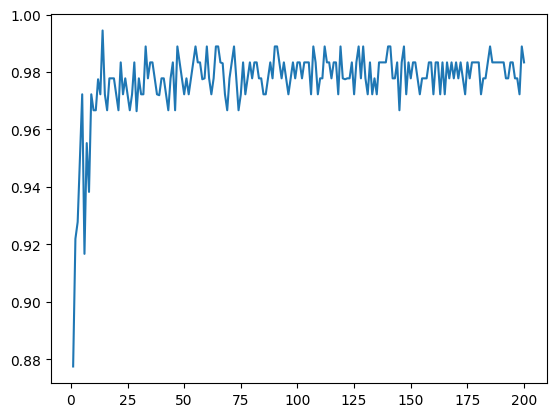

In [7]:
supera=[]
for i in range(1,201):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    supera.append(rfc_s)
print(max(supera),supera.index(max(supera)))
plt.plot(range(1,201),supera,label='Random')

# random_state
随机森林的基评估器是决策树，

In [18]:
rfc = RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(xtrain,ytrain)

#随机森林的重要属性之一：estimators,查看森林中树的状况
#rfc.estimators_[0]
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


# bootstrap & oob_score
bootstrap = true 代表有放回的随机抽样

In [19]:
rfc = RandomForestClassifier(n_estimators=20,random_state=2,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)
rfc.oob_score_

0.9719101123595506

# 重要的属性和接口

In [20]:
rfc = rfc.fit(xtrain,ytrain)
rfc.score(xtest,ytest)

1.0

In [21]:
rfc.feature_importances_

array([0.11475041, 0.01779602, 0.02504147, 0.08383   , 0.02864631,
       0.07426781, 0.09500107, 0.01309627, 0.01975203, 0.17698822,
       0.06353771, 0.14097428, 0.14631841])

In [27]:
rfc.predict_proba(xtest)

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.05, 0.15, 0.8 ],
       [0.9 , 0.1 , 0.  ],
       [0.05, 0.7 , 0.25],
       [0.95, 0.05, 0.  ],
       [0.05, 0.95, 0.  ],
       [0.05, 0.1 , 0.85],
       [0.05, 0.95, 0.  ],
       [0.35, 0.05, 0.6 ],
       [0.55, 0.45, 0.  ],
       [0.  , 0.15, 0.85],
       [0.8 , 0.2 , 0.  ],
       [0.1 , 0.6 , 0.3 ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.95, 0.05],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.9 , 0.1 , 0.  ],
       [0.  , 0.95, 0.05],
       [0.95, 0.05, 0.  ],
       [0.45, 0.55, 0.  ],
       [0.  , 0.75, 0.25],
       [0.  , 0.05, 0.95],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.2 , 0.65, 0.15],
       [0.05, 0.95, 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.1 , 0.05, 0.85],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.1 , 0.35, 0.55],
 

In [26]:
rfc.predict(xtest)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [28]:
rfc.predict_proba(xtest)

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.05, 0.15, 0.8 ],
       [0.9 , 0.1 , 0.  ],
       [0.05, 0.7 , 0.25],
       [0.95, 0.05, 0.  ],
       [0.05, 0.95, 0.  ],
       [0.05, 0.1 , 0.85],
       [0.05, 0.95, 0.  ],
       [0.35, 0.05, 0.6 ],
       [0.55, 0.45, 0.  ],
       [0.  , 0.15, 0.85],
       [0.8 , 0.2 , 0.  ],
       [0.1 , 0.6 , 0.3 ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.95, 0.05],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.9 , 0.1 , 0.  ],
       [0.  , 0.95, 0.05],
       [0.95, 0.05, 0.  ],
       [0.45, 0.55, 0.  ],
       [0.  , 0.75, 0.25],
       [0.  , 0.05, 0.95],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.2 , 0.65, 0.15],
       [0.05, 0.95, 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.1 , 0.05, 0.85],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.1 , 0.35, 0.55],
 

# 3 RandomForestRegressor

# 3.1 重要参数，属性与接口

# criterion
分类树选基尼系数和熵
回归树选均方误差、绝对平均误差，mse越小越好

In [33]:
# 随机森林回归用法
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

wine = load_wine()
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regressor,wine.data,wine.target,cv=10,scoring="neg_mean_squared_error")

array([-0.0146    , -0.04884444, -0.05197222, -0.07756111, -0.09371111,
       -0.01176111, -0.0136    , -0.20569444, -0.17169412, -0.01501765])

# 3.2实例：用随机森林回归填补缺失值

# 1导入需要的库

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# 2导入完整数据并探索

In [11]:
from sklearn.datasets import fetch_openml

x_full, y_full = fetch_openml(name="boston", version=1, as_frame=True, return_X_y=True)

In [12]:
n_samples = x_full.shape[0]
n_feature = x_full.shape[1]

# 3 为完整数据集放入缺失值

In [15]:
rng = np.random.RandomState(0)
missing_rate = 0.5
n_misiiing_samples = int(np.floor(n_samples * n_feature *missing_rate))

In [16]:
missing_features = rng.randint(0,n_feature,n_misiiing_samples)
missing_samples = rng.randint(0,n_samples,n_misiiing_samples)

In [45]:
x_missing = x_full.copy()
y_missing = y_full.copy()

157 1
157 0
157 5
157 8
157 2
157 3
157 12
157 5
157 11
157 3
157 8
157 6
157 4
157 6
157 12
157 3
157 6
157 2
157 12
157 12
157 6
157 5
157 11
157 5
157 9
157 4
157 6
157 5
157 11
157 1
157 3
157 3
157 10
157 8
157 9
157 5
157 5
157 6
157 0
157 9
157 7
157 5
157 1
157 5
157 6
157 12
157 10
157 10
157 11
157 6
157 8
157 7
157 5
157 11
157 10
157 3
157 10
157 2
157 9
157 11
157 9
157 3
157 2
157 5
157 10
157 4
157 1
157 5
157 8
157 3
157 5
157 8
157 4
157 10
157 1
157 7
157 8
157 1
157 2
157 1
157 1
157 7
157 5
157 11
157 0
157 4
157 1
157 1
157 12
157 6
157 6
157 0
157 2
157 3
157 7
157 12
157 9
157 2
157 11
157 4
157 9
157 0
157 12
157 6
157 9
157 2
157 4
157 7
157 3
157 0
157 12
157 5
157 4
157 0
157 2
157 3
157 1
157 7
157 10
157 1
157 3
157 10
157 4
157 10
157 1
157 7
157 4
157 0
157 10
157 2
157 12
157 10
157 7
157 4
157 0
157 2
157 6
157 9
157 2
157 4
157 12
157 9
157 9
157 12
157 5
157 4
157 10
157 4
157 9
157 10
157 12
157 8
157 1
157 5
157 7
157 0
157 10
157 1
157 10
157 3
157

In [54]:
columns = x_missing.columns

In [55]:
x_missing = np.array(x_missing)

In [56]:
x_missing[missing_samples,missing_features] = np.nan

In [28]:
x_missing[missing_samples,missing_features] = np.nan

In [58]:
x_missing = pd.DataFrame(x_missing,columns = columns)

In [59]:
x_missing

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0        NaN  18.0    NaN  NaN  0.538    NaN  65.2    4.09    1  296.0   
1    0.02731   0.0    NaN    0  0.469    NaN  78.9  4.9671    2    NaN   
2    0.02729   NaN   7.07    0    NaN  7.185  61.1     NaN    2  242.0   
3        NaN   NaN    NaN    0  0.458    NaN  45.8     NaN  NaN  222.0   
4        NaN   0.0   2.18    0    NaN  7.147   NaN     NaN  NaN    NaN   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   
501      NaN   NaN    NaN    0  0.573    NaN  69.1     NaN    1    NaN   
502  0.04527   0.0  11.93    0  0.573   6.12  76.7  2.2875    1  273.0   
503      NaN   NaN  11.93  NaN  0.573  6.976  91.0     NaN  NaN    NaN   
504  0.10959   0.0  11.93  NaN  0.573    NaN  89.3     NaN    1    NaN   
505  0.04741   0.0  11.93    0  0.573   6.03   NaN     NaN    1    NaN   

    PTRATIO       B LSTAT  
0       NaN     NaN  4.98  
1       NaN   396.9  9.14  
2       NaN     NaN   NaN  
3      18.7     NaN   NaN  
4      18.7     NaN  5.33  
..      ...     ...   ...  
501    21.0     NaN  9.67  
502     NaN   396.9  9.08  
503    21.0     NaN  5.64  
504    21.0  393.45  6.48  
505     NaN   396.9  7.88  

[506 rows x 13 columns]

# 4使用0和均值填补缺失值

In [60]:
# 使用均值进行填补
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
x_missing_mean = imp_mean.fit_transform(x_missing)

In [61]:
#使用0进行填补
imp_0 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
x_missing_0 = imp_0.fit_transform(x_missing)

In [63]:
x_missing_mean

array([[3.62757895e+00, 1.80000000e+01, 1.11634641e+01, ...,
        1.85211921e+01, 3.52741952e+02, 4.98000000e+00],
       [2.73100000e-02, 0.00000000e+00, 1.11634641e+01, ...,
        1.85211921e+01, 3.96900000e+02, 9.14000000e+00],
       [2.72900000e-02, 1.07229508e+01, 7.07000000e+00, ...,
        1.85211921e+01, 3.52741952e+02, 1.29917666e+01],
       ...,
       [3.62757895e+00, 1.07229508e+01, 1.19300000e+01, ...,
        2.10000000e+01, 3.52741952e+02, 5.64000000e+00],
       [1.09590000e-01, 0.00000000e+00, 1.19300000e+01, ...,
        2.10000000e+01, 3.93450000e+02, 6.48000000e+00],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.85211921e+01, 3.96900000e+02, 7.88000000e+00]])

# 5使用随机森岭填补缺失值

In [138]:
x_missing_reg = x_missing.copy()
sortindex = np.argsort(x_missing_reg.isnull().sum(axis=0)).values
x_missing_reg

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0        NaN  18.0    NaN  NaN  0.538    NaN  65.2    4.09    1  296.0   
1    0.02731   0.0    NaN    0  0.469    NaN  78.9  4.9671    2    NaN   
2    0.02729   NaN   7.07    0    NaN  7.185  61.1     NaN    2  242.0   
3        NaN   NaN    NaN    0  0.458    NaN  45.8     NaN  NaN  222.0   
4        NaN   0.0   2.18    0    NaN  7.147   NaN     NaN  NaN    NaN   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   
501      NaN   NaN    NaN    0  0.573    NaN  69.1     NaN    1    NaN   
502  0.04527   0.0  11.93    0  0.573   6.12  76.7  2.2875    1  273.0   
503      NaN   NaN  11.93  NaN  0.573  6.976  91.0     NaN  NaN    NaN   
504  0.10959   0.0  11.93  NaN  0.573    NaN  89.3     NaN    1    NaN   
505  0.04741   0.0  11.93    0  0.573   6.03   NaN     NaN    1    NaN   

    PTRATIO       B LSTAT  
0       NaN     NaN  4.98  
1       NaN   396.9  9.14  
2       NaN     NaN   NaN  
3      18.7     NaN   NaN  
4      18.7     NaN  5.33  
..      ...     ...   ...  
501    21.0     NaN  9.67  
502     NaN   396.9  9.08  
503    21.0     NaN  5.64  
504    21.0  393.45  6.48  
505     NaN   396.9  7.88  

[506 rows x 13 columns]

In [139]:
for i in sortindex:
    #构建新的矩阵和标签
    df = x_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns!=i],pd.DataFrame(y_full,columns=['label'])],axis=1)


    #新矩阵中，对含有缺失的列，进行0填补
    df_0 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0).fit_transform(df)

    #找出训练集和测试集
    ytrain = fillc[fillc.notnull()]
    ytest = fillc[fillc.isnull()]
    xtrain = df_0[ytrain.index,:]
    xtest = df_0[ytest.index,:]
    #用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(xtrain,ytrain)
    ypredict = rfc.predict(xtest)
    x_missing_reg.iloc[:,i].loc[x_missing_reg.iloc[:,i].isnull()] = ypredict
    #x_missing_reg.loc[x_missing_reg.iloc[:,i].isnull(),i] = ypredict
    #print(x_missing_reg.loc[x_missing_reg.iloc[:,i].isnull(),i])

In [140]:
x_missing_reg

CRIM    ZN   INDUS CHAS      NOX       RM    AGE       DIS  RAD  \
0     0.01437  18.0  0.9942  0.0    0.538  4.56771   65.2      4.09    1   
1     0.02731   0.0  0.9938    0    0.469   4.5795   78.9    4.9671    2   
2     0.02729   0.0    7.07    0  0.39487    7.185   61.1  1.235714    2   
3    0.014532   0.0  0.9591    0    0.458  4.55183   45.8  1.229762  1.0   
4    0.014614   0.0    2.18    0  0.39434    7.147  7.463  1.230156  1.0   
..        ...   ...     ...  ...      ...      ...    ...       ...  ...   
501  0.013243   0.0  0.9888    0    0.573  4.55532   69.1  1.234561    1   
502   0.04527   0.0   11.93    0    0.573     6.12   76.7    2.2875    1   
503  0.013899   0.0   11.93  0.0    0.573    6.976   91.0  1.238259  1.0   
504   0.10959   0.0   11.93  0.0    0.573  4.56572   89.3  1.236224    1   
505   0.04741   0.0   11.93    0    0.573     6.03  7.122  1.231624    1   

        TAX PTRATIO       B   LSTAT  
0     296.0  12.873  7.0765    4.98  
1    189.82  12.713   396.9    9.14  
2     242.0  12.853  8.8142  2.7418  
3     222.0    18.7  9.5759  2.7303  
4    190.88    18.7  8.8291    5.33  
..      ...     ...     ...     ...  
501   188.7    21.0  9.2573    9.67  
502   273.0  12.873   396.9    9.08  
503  190.08    21.0  8.2332    5.64  
504  188.95    21.0  393.45    6.48  
505   191.1  12.897   396.9    7.88  

[506 rows x 13 columns]

# 6对填补好的数据进行建模

In [143]:
# 对所有的数据进行建模，取MSE

x = [x_full,x_missing_mean,x_missing_0,x_missing_reg]

mse = []
std = []

for x in x:
    estimator = RandomForestRegressor(random_state=0,n_estimators=100)
    scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error',cv=5).mean()
    mse.append(scores*-1)

# 7画图

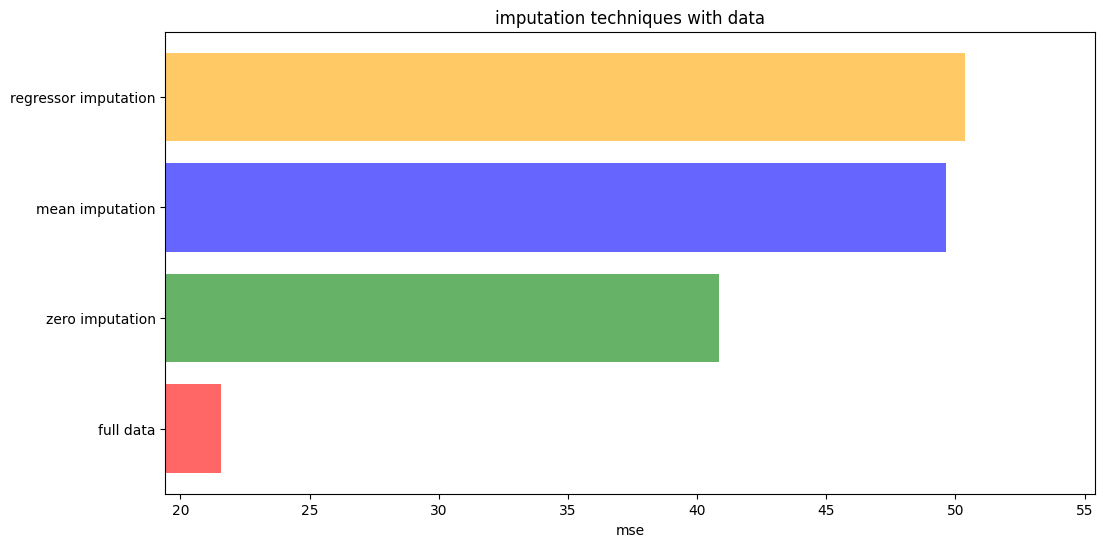

In [148]:
x_labels = ['full data','zero imputation','mean imputation','regressor imputation']
colors = ['r','g','b','orange']

plt.figure(figsize=(12,6))

ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i,mse[i],color = colors[i],alpha=0.6,align='center')
ax.set_title('imputation techniques with data')
ax.set_xlim(left=np.min(mse)*0.9,right=np.max(mse)*1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('mse')
ax.set_yticklabels(x_labels)
plt.show()

# 实例 随机森林在乳腺癌数据上的调参

# 1导入需要的库

In [150]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 2导入数据集，探索数据

In [151]:
data = load_breast_cancer()

In [152]:
data.data.shape
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

# 3进行一次简单的建模，看看模型本身在数据集上的效果

In [153]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean(
)
score

0.9648809523809524

# 4随机森林调整第一步：n_eatimators

0.9631265664160402 7


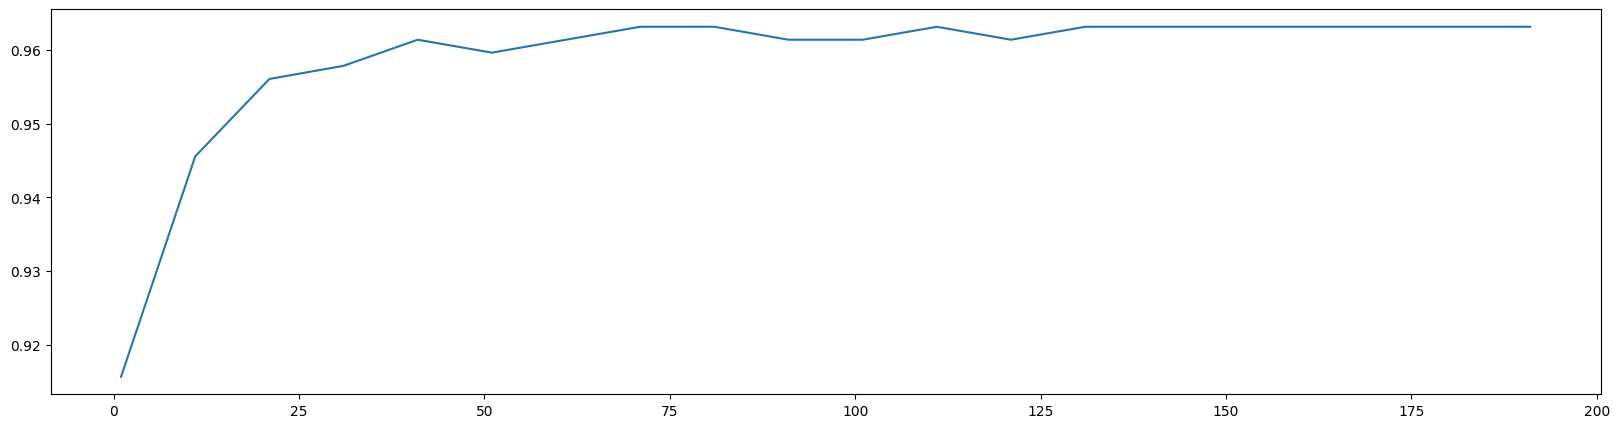

In [154]:
scorel=[]
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,random_state=90)
    scores = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(scores)
print(max(scorel),scorel.index(max(scorel)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

# 5.在确定好的范围内，进一步细化学习曲线

In [157]:
scorel = []
for i in range(35,45):
    rfc = RandomForestClassifier(n_estimators=i,random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(35,45)][scorel.index(max(scorel))]))


0.9613721804511279 41


# 6.为网格搜索做准备，书写网格搜索的参数

In [163]:
param_grid = {'max_depth':np.arange(1,20,1)}

rfc = RandomForestClassifier(n_estimators=41,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'max_depth': 8}

In [164]:
GS.best_score_

0.9648809523809524